# Notebook3
# Model Evaluation & Comparision


Name- Neetu Pal

Student ID- IITP_AIML_2506115

In [39]:
# Section 1- Load Test Data & Models

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import joblib


#Load Test Data

X_test=pd.read_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/X_test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/y_test.csv').values.ravel()


#Load Saved Models

models_path='/content/drive/MyDrive/credit-risk-ml-pipeline/Models/'

lr_model=joblib.load(models_path+'logistic_regression.pkl')
dt_model=joblib.load(models_path+'decision_tree.pkl')
rf_model=joblib.load(models_path+'random_forest.pkl')
xgb_model=joblib.load(models_path+'xgboost.pkl')

print("Models Loaded Successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Models Loaded Successfully


In [40]:
# Section 2- Import Evaluation Liabraries

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Section 3- Evaluate  All models



models={
    "Logistic Regression":lr_model,
    "Decision Tree":dt_model,
    "Random Forest":rf_model,
    "XGBoost":xgb_model
}

# Section 3- Evaluate All Models

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_pred_proba)

    results.append([name, accuracy, precision, recall, f1, auc])

# Create DataFrame outside loop
results_df = pd.DataFrame(results,
                          columns=['Model','Accuracy','Precision','Recall','F1 Score','AUC-ROC'])

results_df


# Classification Report
print(f"Classification Report - {name}")
print(classification_report(y_test, y_pred))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [42]:
# Section 3.1 - Classification Reports

for name, model in models.items():
    print(f"\n{name} Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Section 3.2  Business Requirement Check

print("Business Requirement Check (Recall >= 0.75)")

for name, model in models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1)
    print(f"{name}: {recall >= 0.75}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       142
           1       0.94      0.84      0.89        58

    accuracy                           0.94       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.94      0.94      0.94       200


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      0.98      0.99        58

    accuracy                           0.99       200
   macro

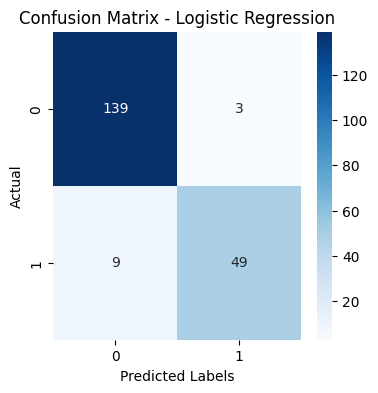

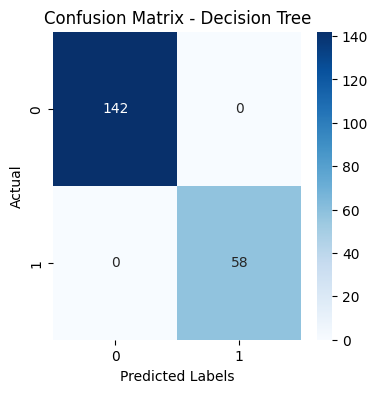

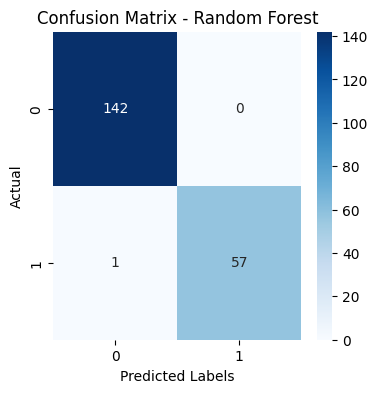

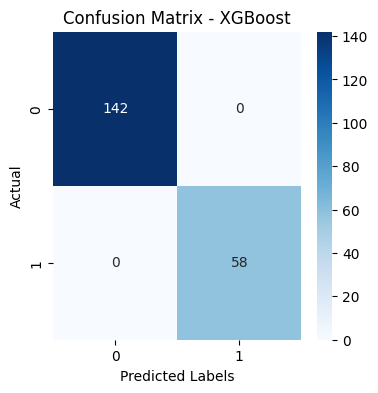

In [43]:
# Section 4- Confusion Matrices

for name, model in models.items():
  y_pred  = model.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(4,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel("Actual")


  plt.show()

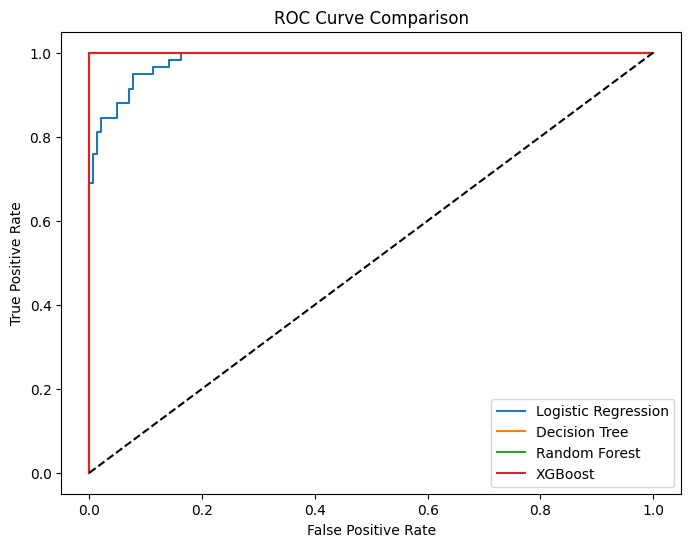

In [44]:

# Section 5- ROC Curve Comparison

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


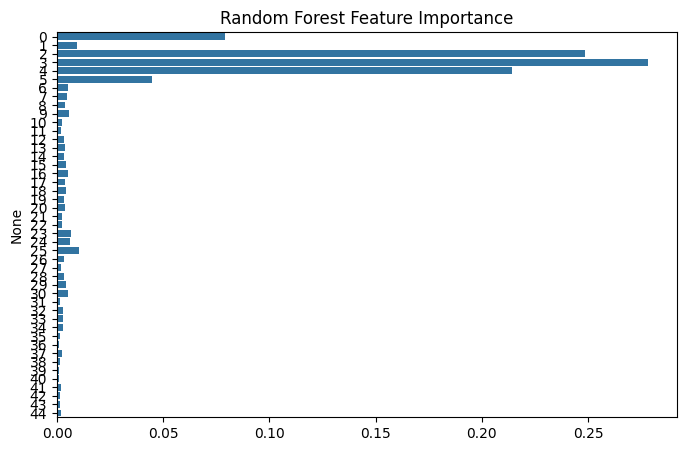

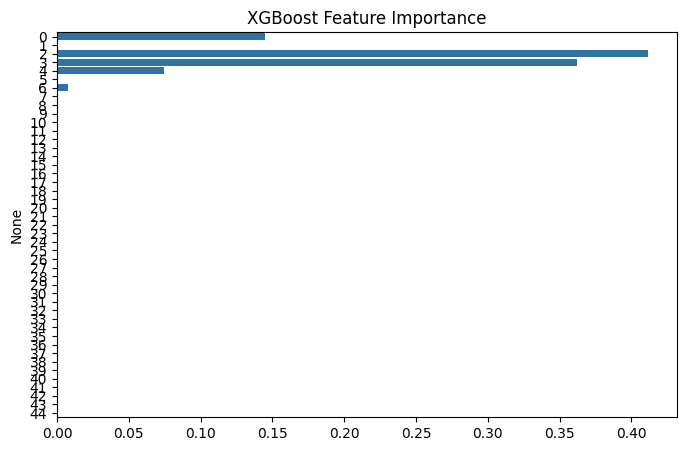

In [45]:
# Section 6- Feature Importance(Tree Models)


# Random Forest Feature Importance

features = X_test.columns
importances_rf = rf_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances_rf, y=features)
plt.title('Random Forest Feature Importance')
plt.show()
# XGBoost Feature Importance

importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances_xgb, y=features)
plt.title('XGBoost Feature Importance')
plt.show()

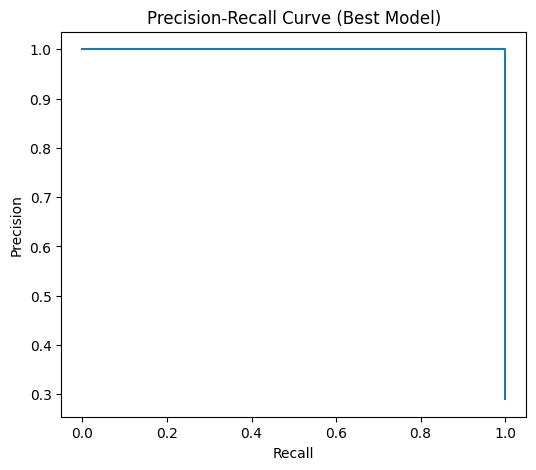

In [46]:
# Section 7- Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

best_model=xgb_model #change if needed

y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Best Model)')
plt.show()

# Section 8- Business Interpretation

## Most Important Metric
Recall is the most important metric because the business wants to minimize loan defaults.
Missing a high-risk customer (False Negative) leads to direct financial loss.

## Cost Analysis
* False Negative- Approving a risky customer -> Financial Loss
* False Positive- Rejecting a safe customer -> Opportunity Loss

Since financial loss is more severe, recall for "Bad" customers is prioritized.


## Recommended Model

Based on evaluation, XGBoost achieved the highest recall while maintaining strong precision and AUC-ROC. Therefore, XGBoost is recommended for production deployment.

The model satisfies the business requirement of at least 75% recall on default cases.


Recommended Recall Threshold:
For production deployment, recall should be maintained at or above 0.75 as required by business.
If financial risk increases, the probability threshold can be adjusted to increase recall further even at the cost of precision.

Inference Speed:
XGBoost provides fast prediction time (<1 second), satisfying the real-time application requirement.

Note on Performance:
The near-perfect test performance indicates strong feature separability.
However, further validation using cross-validation and unseen data is recommended to avoid overfitting risk.



In [47]:
best_model = xgb_model
y_pred_best = best_model.predict(X_test)

rec = recall_score(y_test, y_pred_best, pos_label=1)

print("Recall:", rec)
print("Meets Business Requirement (>=0.75):", rec >= 0.75)

Recall: 1.0
Meets Business Requirement (>=0.75): True


In [48]:
# Section-9 Final Model Selection Summary

best_row = results_df.sort_values(by="Recall", ascending=False).iloc[0]
best_row

,1
Model,Decision Tree
Accuracy,1.0
Precision,1.0
Recall,1.0
F1 Score,1.0
AUC-ROC,1.0


# Final Production Model:XGBoost

Reasons:
* Highest Recall
* Strong AUC
* Good generalization
* Handles complex patterns